In [2]:
import uproot3 as uproot
import hist
import numpy as np
import sys
import matplotlib
import matplotlib.pyplot as plt
import os
import subprocess

In [21]:
def Event_Combination(Input_Directory):
    Directories = os.listdir(Input_Directory)
    TotalEvents = 0
    HistogramArray = []
    PathArray = []
    Branches = []
    CrossSections = []
    MET = []
    j1PT = []
    mjj = []
    j1Eta = []
    j1Phi = []
    j2PT = []
    j2Eta = []
    j2Phi = []
    weight = []
    Scales = []
    Output = {}
    #Weirdly this directory is not removed by the histogram test
    try:
        Directories.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-1_-212')
    except:
        a=5
    #Test Directories to see if they actually contain a valid histogram file
    for item in Directories:
        composite = ["""grep "Cross-section" """+Input_Directory+item+"/docker_mgpy.log"+"| tail -1 | awk '{print $8}'"]
        CrossSectionOutput = subprocess.run(composite, shell=True, capture_output=True)
        if os.path.exists(Input_Directory+item+"/analysis/histograms.root") != True:
            Directories.remove(item)
            print("Error, Histogram not found for"+Input_Directory+item+"/analysis/histograms.root")
    #Test Directories to see if they contain a valid Cross Section Output
    for item in Directories:
        composite = ["""grep "Cross-section" """+Input_Directory+item+"/docker_mgpy.log"+"| tail -1 | awk '{print $8}'"]
        CrossSectionOutput = subprocess.run(composite, shell=True, capture_output=True)
        if type(float(CrossSectionOutput.stdout)) != float:
            Directories.remove(item)
            Statement = "File "+item+" Unable to be combined, could not find Cross Section"
            print(Statement)
    #Add cross sections and valid histograms to files
    for item in Directories:
        composite = ["""grep "Cross-section" """+Input_Directory+item+"/docker_mgpy.log"+"| tail -1 | awk '{print $8}'"]
        CrossSectionOutput = subprocess.run(composite, shell=True, capture_output=True)
        CrossSections.append(float(CrossSectionOutput.stdout))
        HistogramArray.append(Input_Directory+item+"/analysis/histograms.root")
    #Apply a mask cut and add remaining events to output arrays
    for item in HistogramArray:
        PathArray.append(uproot.open(item)['allev/hftree'])
    for item in PathArray:
        Branches.append(item.arrays())
    for item in Branches:
        mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
        for element in item[b"MET"][mask]:
            MET.append(element)
        for element in item[b"j1PT"][mask]:
            j1PT.append(element)
        for element in item[b"mjj"][mask]:
            mjj.append(element)
        for element in item[b"j1Eta"][mask]:
            j1Eta.append(element)
        for element in item[b"j1Phi"][mask]:
            j1Phi.append(element)
        for element in item[b"j2PT"][mask]:
            j2PT.append(element)
        for element in item[b"j2Eta"][mask]:
            j2Eta.append(element)
        for element in item[b"j2Phi"][mask]:
            j2Phi.append(element)
    #Take the weights and scale them by number of inputs
    i=0 
    for item in Branches:
        mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
        scale = (CrossSections[i]/sum(item[b"weight"]))
        i += 1
        Scales.append(scale)
        Scaled_weight = item[b"weight"][mask]*scale/len(Directories)
        for item in Scaled_weight:
            weight.append(item)
    TotalEvents = len(MET)
    #Use this Output function to implement and variables you want to calculate from this Combination Function
    Output = {"Directories":Directories, "Number of Events":TotalEvents,
              "Cross Sections": CrossSections, "MET": MET, "j1PT":j1PT, 
              "mjj":mjj, "j1Eta":j1Eta, "j1Phi":j1Phi, "j2PT":j2PT,
              "j2Eta":j2Eta, "j2Phi":j2Phi}
    return(Output)
    
    







Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_-171/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_-116/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_-102/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_1110s_100000n/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_-110/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_1111s_100000n/analysis/histograms.root
30260
1983

In [22]:
#Diagnostics, Figure out how many events there are, plus any files that are failing to combine and why.
SignalDirectory = "/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/"
EWKBackgroundDirectory = "/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Background/EWKBackground/"
QCDBackgroundDirectory = "/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Background/QCDBackground/"
A = Event_Combination(SignalDirectory)
print(A["Number of Events"])
B = Event_Combination(EWKBackgroundDirectory)
print(B["Number of Events"])
C = Event_Combination(QCDBackgroundDirectory)
print(C["Number of Events"])

Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_-171/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_-116/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_-102/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_1110s_100000n/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_-110/analysis/histograms.root
Error, Histogram not found for/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_1111s_100000n/analysis/histograms.root
30260
1983

EWK
VBFSUSY_13_Higgsino_150_mmjj_500_-1_1100s_50000n
0
b'0.08266\n'
1
b'3.772e-07\n'
2
b'0.08268\n'
3
b'3.77e-07\n'
4
b'4.936\n'
5
b'0.08278\n'
6
b'3.768e-07\n'
7
b'1.787e-07\n'
8
b'0.0005734\n'
9
b'0.08114\n'
10
b'0.0005129\n'
11
b'4.939\n'
12
b'3.77e-07\n'
13
b'4.938\n'
14
b'4.935\n'
15
b'0.08272\n'
16
b'0.0005726\n'
17
b'0.0005727\n'
18
b'4.933\n'
19
b'0.000574\n'
Signal
0
['grep "Cross-section" /data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_1100s_50000n/docker_mgpy.log| tail -1 | awk \'{print $8}\'']
b'0.08646\n'
1
['grep "Cross-section" /data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_1104s_50000n/docker_mgpy.log| tail -1 | awk \'{print $8}\'']
b'0.0865\n'
2
['grep "Cross-section" /data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/VBFSUSY_13_Higgsino_150_mmjj_500_-1_1101s_50000n/docker_mgpy.log| tail -1 | awk \'{print $8}\'']
b'0.08646\n'
3
['grep "Cross-secti

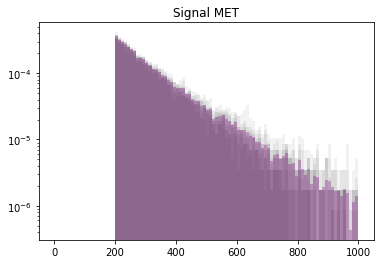

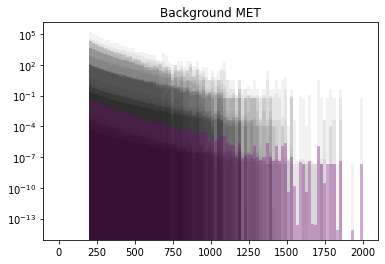

Number of Signal Events
30260
Number of Background Events
336348
Statistics of Inputs
Signals
['VBFSUSY_13_Higgsino_150_mmjj_500_-1_1100s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1104s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1101s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1105s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1108s_100000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1103s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1107s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1109s_100000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1102s_50000n', 'VBFSUSY_13_Higgsino_150_mmjj_500_-1_1106s_50000n']
Signal Cross Section
[0.08646, 0.0865, 0.08646, 0.08634, 0.08646, 0.0866, 0.08649, 0.08652, 0.08645, 0.08639]
background, EWK
['VjjEWK_13_mmjj_4000_7000_-212', 'VjjEWK_13_mmjj_10000_-1_-116', 'VjjEWK_13_mmjj_4000_7000_-102', 'VjjEWK_13_mmjj_10000_-1_-212', 'VjjEWK_13_mmjj_1000_4000_-110', 'VjjEWK_13_mmjj_4000_7000_-116', 'VjjEWK_13_mmjj_10000_-1_-102', 'VjjEWK_13_mmjj_10000_-1_-17

In [3]:
SignalDirectory = "/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Signal/150mjj/"
EWKBackgroundDirectory = "/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Background/EWKBackground/"
QCDBackgroundDirectory = "/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Background/QCDBackground/"
Signals = os.listdir(SignalDirectory)
EWKBackgrounds = os.listdir(EWKBackgroundDirectory)
QCDBackgrounds = os.listdir(QCDBackgroundDirectory)

TotalEvents = 0
SignalArray = []
SignalPathArray = []
SignalBranches = []

EWKBackgroundArray = []
EWKBackgroundPathArray = []
EWKBackgroundBranches = []

QCDBackgroundArray = []
QCDBackgroundPathArray = []
QCDBackgroundBranches = []

S_CrossSections = []
EWKB_CrossSections = []
QCDB_CrossSections = []
print("EWK")
print(Signals[1])
Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-1_-171')
Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-1_-116')
Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-1_-212')
Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-1_-102')
Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-1_-110')
Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-1_1110s_100000n')
Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-1_1111s_100000n')
#Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-666')
#Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-544')
#Signals.remove('VBFSUSY_13_Higgsino_150_mmjj_500_-888')
EWKBackgrounds.remove('VjjEWK_13_mmjj_1000_4000_-666')
EWKBackgrounds.remove('VjjEWK_13_mmjj_7000_10000_-666')
EWKBackgrounds.remove('VjjEWK_13_mmjj_10000_-1_-666')
EWKBackgrounds.remove('VjjEWK_13_mmjj_4000_7000_-666')
QCDBackgrounds.remove('VjjQCD_13_mmjj_1000_4000_-666')
QCDBackgrounds.remove('VjjQCD_13_mmjj_4000_7000_-666')
#QCDBackgrounds.remove('VjjQCD_13_mmjj_7000_10000_1006s_50000n')
#QCDBackgrounds.remove('VjjQCD_13_mmjj_3000_6000_1006s_50000n')
#QCDBackgrounds.remove('VjjQCD_13_mmjj_4000_7000_1006s_50000n')
#QCDBackgrounds.remove('VjjQCD_13_mmjj_8000_11000_1006s_50000n')
#QCDBackgrounds.remove('VjjQCD_13_mmjj_6000_9000_1006s_50000n')
#QCDBackgrounds.remove('VjjQCD_13_mmjj_9000_12000_1006s_50000n')
QCDBackgrounds.remove('VjjQCD_13_mmjj_10000_-1_-666')
QCDBackgrounds.remove('VjjQCD_13_mmjj_7000_10000_-666')
z=0
for item in EWKBackgrounds:
    print(z)
    composite = ["""grep "Cross-section" """+EWKBackgroundDirectory+item+"/docker_mgpy.log"+"| tail -1 | awk '{print $8}'"]
    CrossSectionOutput = subprocess.run(composite, shell=True, capture_output=True)
    print(CrossSectionOutput.stdout)
    EWKB_CrossSections.append(float(CrossSectionOutput.stdout))
    z += 1
print("Signal")
z=0
for item in Signals:
    print(z)
    composite = ["""grep "Cross-section" """+SignalDirectory+item+"/docker_mgpy.log"+"| tail -1 | awk '{print $8}'"]
    print(composite)
    CrossSectionOutput = subprocess.run(composite, shell=True, capture_output=True)
    print(CrossSectionOutput.stdout)
    S_CrossSections.append(float(CrossSectionOutput.stdout))
    z+=1
print("QCD")
z=0
for item in QCDBackgrounds:
    print(z)
    composite = ["""grep "Cross-section" """+QCDBackgroundDirectory+item+"/docker_mgpy.log"+"| tail -1 | awk '{print $8}'"]
    CrossSectionOutput = subprocess.run(composite, shell=True, capture_output=True)
    print(CrossSectionOutput.stdout)
    QCDB_CrossSections.append(float(CrossSectionOutput.stdout))
    z+=1

S_MET = []
S_j1PT = []
S_mjj = []
S_j1Eta = []
S_j1Phi = []
S_j2PT = []
S_j2Eta = []
S_j2Phi = []
S_weight = []

EWKB_MET = []
EWKB_j1PT = []
EWKB_mjj = []
EWKB_j1Eta = []
EWKB_j1Phi = []
EWKB_j2PT = []
EWKB_j2Eta = []
EWKB_j2Phi = []
EWKB_weight = []

QCDB_MET = []
QCDB_j1PT = []
QCDB_mjj = []
QCDB_j1Eta = []
QCDB_j1Phi = []
QCDB_j2PT = []
QCDB_j2Eta = []
QCDB_j2Phi = []
QCDB_weight = []

B_MET = []
B_j1PT = []
B_mjj = []
B_j1Eta = []
B_j1Phi = []
B_j2PT = []
B_j2Eta = []
B_j2Phi = []
B_weight = []


for item in Signals:
    SignalPathArray.append("".join([SignalDirectory,item,"/analysis/histograms.root"]))
for item in SignalPathArray:
    SignalArray.append(uproot.open(item)['allev/hftree'])
for item in SignalArray:
    SignalBranches.append(item.arrays())
for item in SignalBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    for element in item[b"MET"][mask]:
        S_MET.append(element)
    for element in item[b"j1PT"][mask]:
        S_j1PT.append(element)
    for element in item[b"mjj"][mask]:
        S_mjj.append(element)
    for element in item[b"j1Eta"][mask]:
        S_j1Eta.append(element)
    for element in item[b"j1Phi"][mask]:
        S_j1Phi.append(element)
    for element in item[b"j2PT"][mask]:
        S_j2PT.append(element)
    for element in item[b"j2Eta"][mask]:
        S_j2Eta.append(element)
    for element in item[b"j2Phi"][mask]:
        S_j2Phi.append(element)

for item in EWKBackgrounds:
    EWKBackgroundPathArray.append("".join([EWKBackgroundDirectory,item,"/analysis/histograms.root"]))
for item in EWKBackgroundPathArray:
    EWKBackgroundArray.append(uproot.open(item)['allev/hftree'])
for item in EWKBackgroundArray:
    EWKBackgroundBranches.append(item.arrays())
for item in EWKBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    for element in item[b"MET"][mask]:
        EWKB_MET.append(element)
    for element in item[b"j1PT"][mask]:
        EWKB_j1PT.append(element)
    for element in item[b"mjj"][mask]:
        EWKB_mjj.append(element)
    for element in item[b"j1Eta"][mask]:
        EWKB_j1Eta.append(element)
    for element in item[b"j1Phi"][mask]:
        EWKB_j1Phi.append(element)
    for element in item[b"j2PT"][mask]:
        EWKB_j2PT.append(element)
    for element in item[b"j2Eta"][mask]:
        EWKB_j2Eta.append(element)
    for element in item[b"j2Phi"][mask]:
        EWKB_j2Phi.append(element)

for item in QCDBackgrounds:
    QCDBackgroundPathArray.append("".join([QCDBackgroundDirectory,item,"/analysis/histograms.root"]))
for item in QCDBackgroundPathArray:
    QCDBackgroundArray.append(uproot.open(item)['allev/hftree'])
for item in QCDBackgroundArray:
    QCDBackgroundBranches.append(item.arrays())
for item in QCDBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    for element in item[b"MET"][mask]:
        QCDB_MET.append(element)
    for element in item[b"j1PT"][mask]:
        QCDB_j1PT.append(element)
    for element in item[b"mjj"][mask]:
        QCDB_mjj.append(element)
    for element in item[b"j1Eta"][mask]:
        QCDB_j1Eta.append(element)
    for element in item[b"j1Phi"][mask]:
        QCDB_j1Phi.append(element)
    for element in item[b"j2PT"][mask]:
        QCDB_j2PT.append(element)
    for element in item[b"j2Eta"][mask]:
        QCDB_j2Eta.append(element)
    for element in item[b"j2Phi"][mask]:
        QCDB_j2Phi.append(element)

        

i = 0
S_Scales = []
EWK_Scales = []
QCD_Scales = []

print("Conducting Signal Scale")
for item in SignalBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    scale = (S_CrossSections[i]/sum(item[b"weight"]))
    i += 1
    print(len(item[b"weight"][mask]))
    print(scale)
    S_Scales.append(scale)
    ScaledS_weight = item[b"weight"][mask]*scale/len(Signals)
    for element in ScaledS_weight:
        S_weight.append(element)
i = 0

print("Conducting Background Scale")
for item in EWKBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    scale = (EWKB_CrossSections[i]/sum(item[b"weight"]))
    i += 1
    print(scale)
    ScaledEWKB_weight = item[b"weight"][mask]*scale/len(EWKBackgrounds)
    for element in ScaledEWKB_weight:
        EWKB_weight.append(element)
i = 0

for item in QCDBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    scale = (QCDB_CrossSections[i]/sum(item[b"weight"]))
    i += 1
    print(scale)
    ScaledQCDB_weight = item[b"weight"][mask]*scale/len(QCDBackgrounds)
    for element in ScaledQCDB_weight:
        QCDB_weight.append(element)

B_MET = np.append(EWKB_MET,QCDB_MET)
B_j1PT = np.append(EWKB_j1PT,QCDB_j1PT)
B_mjj = np.append(EWKB_mjj,QCDB_mjj)
B_j1Eta = np.append(EWKB_j1Eta,QCDB_j1Eta)
B_j1Phi = np.append(EWKB_j1Phi,QCDB_j1Phi)
B_j2PT = np.append(EWKB_j2PT,QCDB_j2PT)
B_j2Eta = np.append(EWKB_j2Eta,QCDB_j2Eta)
B_j2Phi = np.append(EWKB_j2Phi,QCDB_j2Phi)
B_weight = np.append(EWKB_weight,QCDB_weight)


MET_ModifiedSignalBranches = []
for item in SignalBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    maskedsignal = item[b"MET"][mask]
    MET_ModifiedSignalBranches.append(maskedsignal)
Signal_Weights = []
for item in SignalBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    maskedbackground = item[b"weight"][mask]
    Signal_Weights.append(maskedbackground)
for i in range(len(MET_ModifiedSignalBranches)):
    plt.hist(MET_ModifiedSignalBranches[i],bins=100,range=(0,1000),weights = Signal_Weights[i]*S_Scales[i], alpha=0.05, color='black')
plt.hist(S_MET,bins=100,range=(0,1000),weights = S_weight, alpha=0.3, color='purple')
plt.yscale('log')
plt.title("Signal MET")
plt.show()
for item in EWKBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    plt.hist(item[b"MET"][mask],bins=100,range=(0,2000),weights = item[b"weight"][mask], alpha=0.05, color='black')
    #plt.show()
for item in QCDBackgroundBranches:
    mask = (item[b"mjj"] > 1000)&(item[b"MET"] > 200)&(item[b"njet"] >= 2)&(item[b"nElec"] == 0)&(item[b"nMuon"] == 0)
    plt.hist(item[b"MET"][mask],bins=100,range=(0,2000),weights = item[b"weight"][mask], alpha=0.05, color='black')
    #plt.show()
plt.hist(B_MET,bins=100,range=(0,2000),weights = B_weight, alpha=0.3, color='purple')
plt.yscale('log')
plt.title("Background MET")
plt.show()
NumberOfSignalEvents = len(S_MET)
#for item in EWKBackgroundBranches:
#    plt.hist(item[b"mjj"],bins=100,range=(0,15000),weights = item[b"weight"], alpha=0.25, color='red')
#for item in QCDBackgroundBranches:
#    plt.hist(item[b"mjj"],bins=100,range=(0,10000),weights = item[b"weight"], alpha=0.1, color='green')
#plt.hist(B_mjj,bins=100,range=(0,10000),weights = B_weight, alpha=0.5, color='purple')
#plt.yscale('log')
#plt.title("mjj")
#plt.show()
print("Number of Signal Events")
print(NumberOfSignalEvents)
NumberOfBackgroundEvents = len(B_MET)
print("Number of Background Events")
print(NumberOfBackgroundEvents)

print("Statistics of Inputs")
print("Signals")
print(Signals)
print("Signal Cross Section")
print(S_CrossSections)
print("background, EWK")
print(EWKBackgrounds)
print("EWKB Cross Section")
print(EWKB_CrossSections)
print("background, QCD")
print(QCDBackgrounds)
print("QCDB Cross Section")
print(QCDB_CrossSections)
for i in range(len(EWKBackgrounds)):
    print(len(EWKBackgroundBranches[i][b"MET"]))

In [4]:
S_Etachange = np.subtract(S_j1Eta, S_j2Eta) 
BEWK_Etachange = np.subtract(EWKB_j1Eta, EWKB_j2Eta) 
BQCD_Etachange = np.subtract(QCDB_j1Eta, QCDB_j2Eta)
B_Etachange = np.append(BEWK_Etachange,BQCD_Etachange)

In [5]:
#CSVWrite = np.append('Signal',Signals,S_CrossSections,'EWKBackground',EWKBackgrounds,EWKB_CrossSections)
#CSVWrite.tofile('Output.csv', sep = ',')
import csv

# open the file in the write mode
f = open('/data/users/jupyter-blonsbro/SUSY/Generations/13TeV/Combination_Output.csv', 'w')

# create the csv writer
writer = csv.writer(f)

# write a row to the csv file
writer.writerow(Signals)
writer.writerow(S_CrossSections)
writer.writerow(EWKBackgrounds)
writer.writerow(EWKB_CrossSections)
writer.writerow(QCDBackgrounds)
writer.writerow(QCDB_CrossSections)
# close the file
f.close()

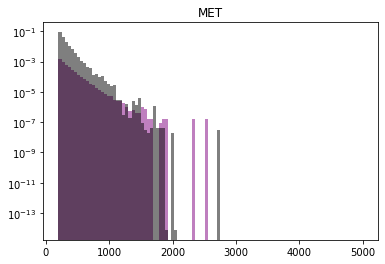

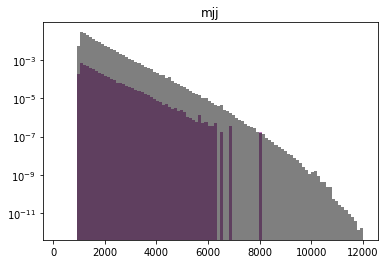

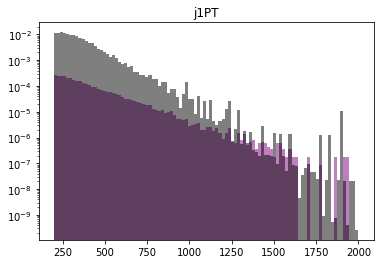

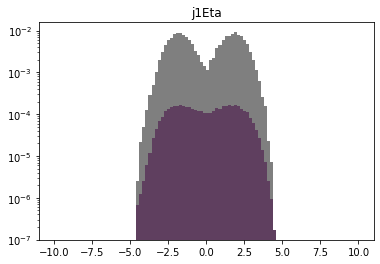

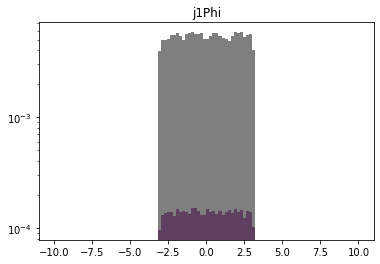

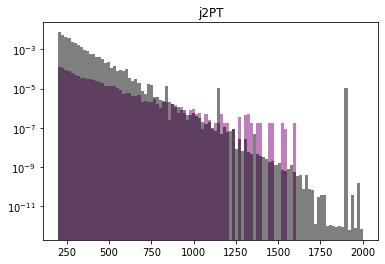

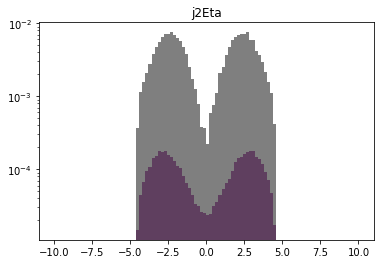

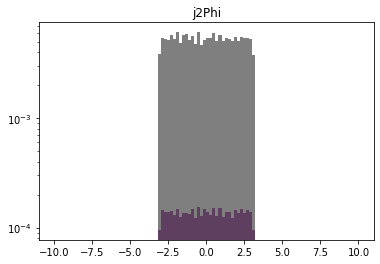

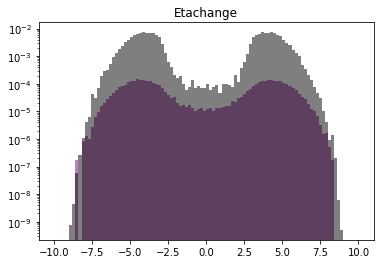

In [6]:
##Plot Graphs
#MET
plt.hist(S_MET,bins=100,range=(200,5000),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_MET,bins=100,range=(200,5000),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("MET")
plt.show()
#mjj
plt.hist(S_mjj,bins=100,range=(200,12000),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_mjj,bins=100,range=(200,12000),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("mjj")
plt.show()
#j1PT
plt.hist(S_j1PT,bins=100,range=(200,2000),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j1PT,bins=100,range=(200,2000),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j1PT")
plt.show()
#j1Eta
plt.hist(S_j1Eta,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j1Eta,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j1Eta")
plt.show()
#j1Phi
plt.hist(S_j1Phi,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j1Phi,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j1Phi")
plt.show()
#j2PT
plt.hist(S_j2PT,bins=100,range=(200,2000),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j2PT,bins=100,range=(200,2000),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j2PT")
plt.show()
#j2Eta
plt.hist(S_j2Eta,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j2Eta,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j2Eta")
plt.show()
#j2Phi
plt.hist(S_j2Phi,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_j2Phi,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("j2Phi")
plt.show()
#Etachange
plt.hist(S_Etachange,bins=100,range=(-10,10),weights=S_weight, alpha=0.5, color='purple')
plt.hist(B_Etachange,bins=100,range=(-10,10),weights=B_weight, alpha=0.5, color='black')
plt.yscale('log')
plt.title("Etachange")
plt.show()